    
# Test group 1 Database NIST
Special Database 19 contains NIST's entire corpus of training materials for handprinted document and character recognition.


# Load database 
   - load_nist()

In [1]:
import sys
sys.path.append('../')
import sarpy.binaryScale 
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt
from sarpy.datasets import *
from sarpy import *

dataset = load_nist()
print(len(dataset['bitmaps']), "images")
print(len(dataset['names']), "class")
print("----------------------------");

%load_ext autoreload
%autoreload 2

6200 images
62 class
----------------------------


# Shape scale
- sarpy.binaryScale.shapeScale

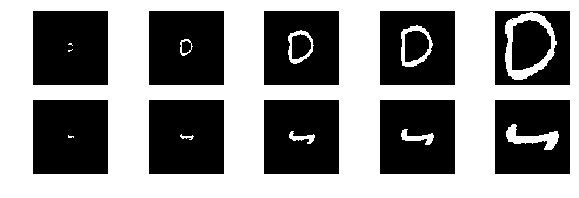

In [2]:
def visualize(data,nclass):
    plt.rcParams["figure.figsize"] = [10,3]    
    x = 5;
    y = nclass
    fig, axes = plt.subplots(y,x)
    k = i = j = 0
    idx = 0;
    for char in data:
        idx = 0
        for sc in [4,2,1,0.8,0.5]:
            axes[i,idx].axis('off')
            axes[i,idx].imshow(sarpy.binaryScale.shapeScale(char,sc,(char.shape[0]/2,char.shape[1]/2)),cmap='gray')
            idx+=1
        i = i + 1        
        
    plt.show()

visualize(dataset['bitmaps'][::6000],len(dataset['bitmaps'][::6000]))

# Contour functions

- plotContour(aContour)
- plotContour1D(aContour)
- contour2bm(aContour)

In [3]:
aContour = np.array([[0,2,2],[1,1,3],[2,1,4],[3,1,5],
                     [4,2,6],[5,3,5],[6,4,5],[7,5,6],
                     [8,6,5],[9,6,4],[10,6,3],[11,5,2],
                     [12,4,1],[13,3,1],[14,2,2]]);

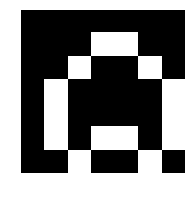

In [4]:
from sarpy import plotContour
sarpy.plotContour.plotContour(aContour)

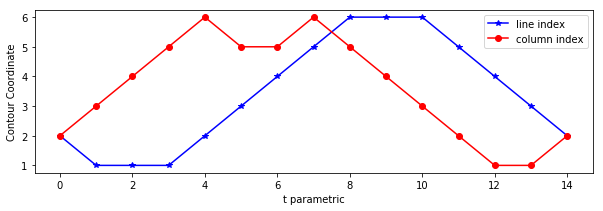

In [5]:
from sarpy import plotContour1D
sarpy.plotContour1D.plotContour1D(aContour)

In [6]:
from sarpy import plotContour
print(sarpy.plotContour.contour2bm(aContour))

[[0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0]
 [0 1 0 0 0 0 1]
 [0 1 0 0 0 0 1]
 [0 1 0 1 1 0 1]
 [0 0 1 0 0 1 0]]


In [7]:
def bitmap2setPoints(bitmap,adj=4):
    adjx = []
    adjy = []
    if adj == 8:
        adjx = [-1,0,1,-1,1,-1,0,1];
        adjy = [-1,-1,-1,0,0,1,1,1];
    else:
        adjx = [0,-1,1,0];
        adjy = [-1,0,0,1];
        
    adjn = len(adjx)
    nrows,ncols = bitmap.shape
    setPoints = set();
    for i in range(0,nrows):
        for j in range(0,ncols):
            if bitmap[i,j] == 1:
                for dx,dy in zip(adjx,adjy):        
                    x = i + dx
                    y = j + dy
                    if x >= 0 and x < ncols and y >=0 and y < nrows:
                        if bitmap[x,y] == 0:                        
                            setPoints.add(tuple([x,y]))
    return list(setPoints)

# Contour Set points
    - contour set points  function bitmap2setPoints(bitmap,adjacency = 4)

In [18]:
from sarpy import plotContour
from sarpy import bitmap2pointsSet

arr = np.array([[0,3,2],[1,4,2],[3,2,3],
                [4,2,4],[5,2,5],[6,5,3],[7,5,4],
                [8,3,4],[9,4,4],[9,5,5]]);
img = np.zeros((8,8))
img[:6,:6] = sarpy.plotContour.contour2bm(arr)
img2 = dataset['bitmaps'][600]
plt.rcParams["figure.figsize"] = [18,10] 
fig, axes = plt.subplots(3,2)
axes[0,0].axis('off')
axes[0,0].imshow(img,cmap='gray')
axes[0,1].axis('off')
axes[0,1].imshow(img2,cmap='gray');


In [19]:
img_out = np.zeros(img.shape)
for p in bitmap2setPoints(img,4):
    img_out[p[0],p[1]] = 1

axes[1,0].axis('off')
axes[1,0].imshow(img_out,cmap='gray');

img2 = dataset['bitmaps'][600]
img_out = np.zeros(img2.shape)
for p in bitmap2setPoints(img2,4):
    img_out[p[0],p[1]] = 1

axes[1,1].axis('off')
axes[1,1].imshow(img_out,cmap='gray');

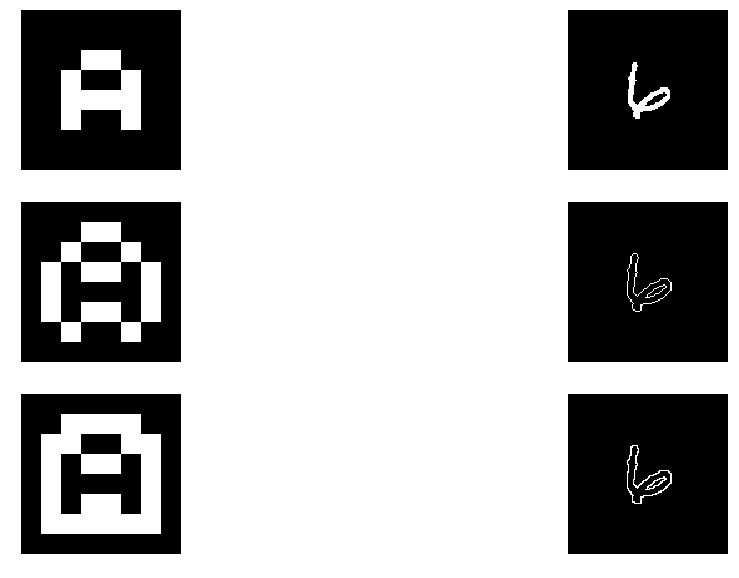

In [20]:
img_out = np.zeros(img.shape)
for p in bitmap2setPoints(img,8):
    img_out[p[0],p[1]] = 1
# plt.imshow(img_out,cmap='gray')

axes[2,0].axis('off')
axes[2,0].imshow(img_out,cmap='gray');

img2 = dataset['bitmaps'][600]
img_out = np.zeros(img2.shape)
for p in bitmap2setPoints(img2,8):
    img_out[p[0],p[1]] = 1
# plt.imshow(img_out,cmap='gray')
# plt.show() 

axes[2,1].axis('off')
axes[2,1].imshow(img_out,cmap='gray');
plt.show()    


In [ ]:
# dataset = 0